In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import esda
import libpysal as lps

import warnings
warnings.filterwarnings("ignore")

import os
GEODATA_PATH = 'data/geodata/'
OUTPUT_PATH = 'data/output/'

## Barangays GeoData

In [2]:
brgys_geodata = gpd.read_file(GEODATA_PATH+'AdministrativeBoundariesBARMMBarangays20190206PSA2016/AdministrativeBoundariesBARMMBarangays20190206PSA2016.shp')
cond = brgys_geodata['Reg_Code']=='PH150000000'
brgys_geodata = brgys_geodata.to_crs("EPSG:4326")
brgys_geodata=brgys_geodata[cond].reset_index(drop=True)
brgys_geodata.head()

,Reg_Code,Reg_Name,Pro_Code,Pro_Name,Mun_Code,Mun_Name,Bgy_Code,Bgy_Name,geometry
0,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH157000000,TAWI-TAWI,PH157001000,PANGLIMA SUGALA (BALIMBING),PH157001001,Balimbing Proper,"MULTIPOLYGON (((119.95374 5.07851, 119.95384 5..."
1,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH157000000,TAWI-TAWI,PH157001000,PANGLIMA SUGALA (BALIMBING),PH157001002,Batu-batu (Pob.),"POLYGON ((119.88709 5.06919, 119.88709 5.06920..."
2,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH157000000,TAWI-TAWI,PH157001000,PANGLIMA SUGALA (BALIMBING),PH157001003,Buan,"MULTIPOLYGON (((120.06363 5.16131, 120.06365 5..."
3,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH157000000,TAWI-TAWI,PH157001000,PANGLIMA SUGALA (BALIMBING),PH157001004,Dungon,"POLYGON ((120.13585 5.19601, 120.13584 5.19603..."
4,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH157000000,TAWI-TAWI,PH157001000,PANGLIMA SUGALA (BALIMBING),PH157001005,Luuk Buntal,"MULTIPOLYGON (((119.98776 4.98564, 119.98774 4..."


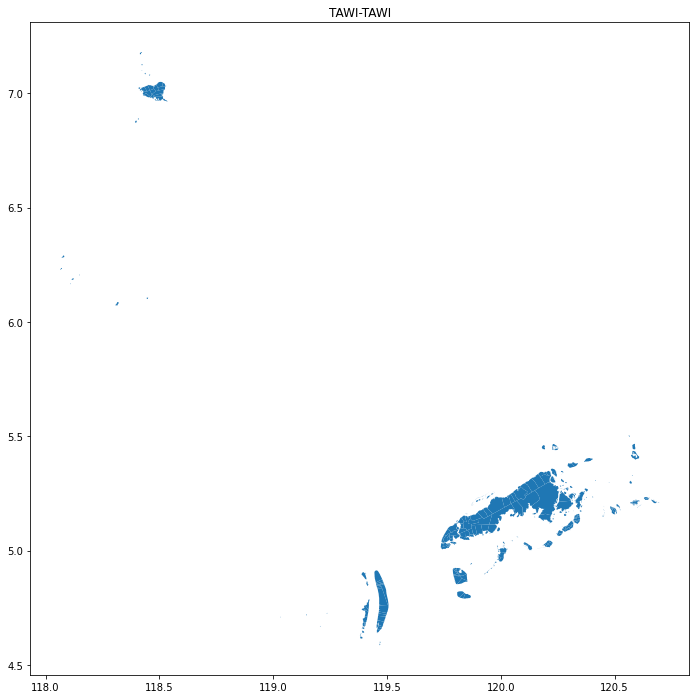

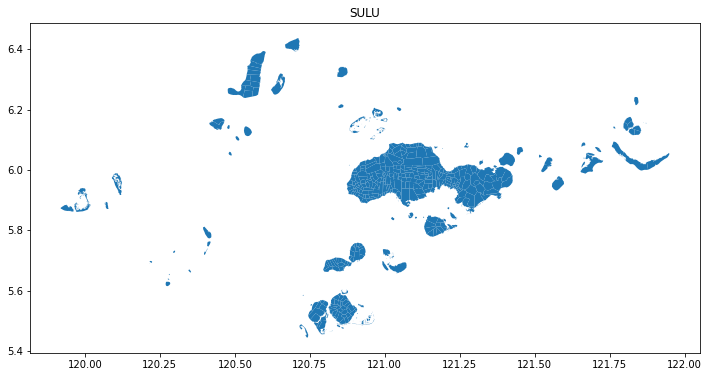

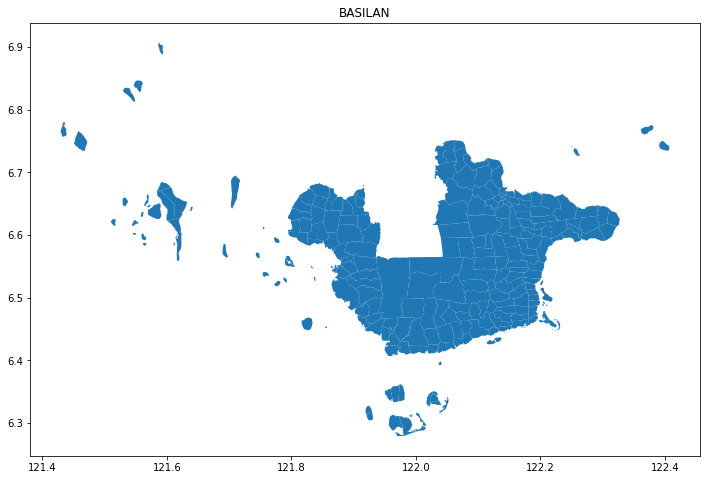

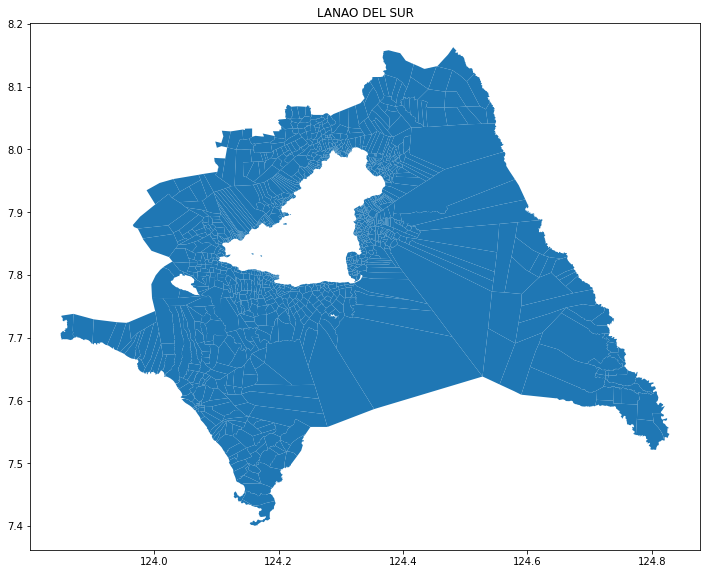

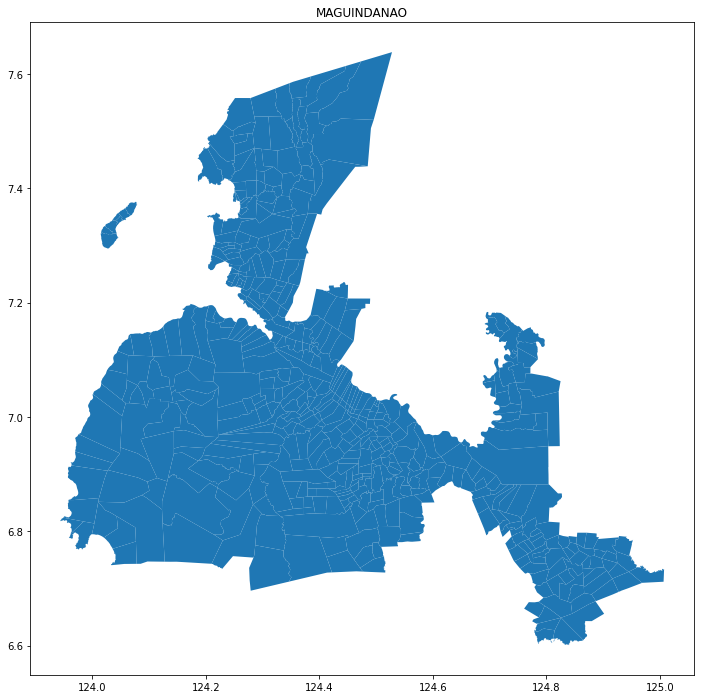

In [3]:
for province in brgys_geodata['Pro_Name'].unique():
    cond = brgys_geodata['Pro_Name']==province
    brgys_geodata[cond].plot(figsize=(12, 12))
    plt.title(province)
    plt.show()

## Schools GeoData

In [4]:
schools_geodata = gpd.read_file(OUTPUT_PATH+'SchoolsDepEd2017_Geodata_Clean/SchoolsDepEd2017_Geodata_Clean.shp')
schools_geodata.head()

,SCH_ID,SCH_NAME,SCH_CAT,SCH_TYPE,LAT,LONG,BARANGAY,MUNNAME,PROV,PSGC_BRGY,PSGC_PROV,PSGC_CITY/,geometry
0,133049,Abong-Abong ES,ES,PUBLIC,6.507703,121.910937,Abong-Abong,Maluso,BASILAN,PH150704001,PH150700000,PH150704000,POINT (121.91094 6.50770)
1,215015,Akbar ES,ES,PUBLIC,6.664125,122.195725,Upper Bato-Bato,Akbar,BASILAN,PH150708008,PH150700000,PH150708000,POINT (122.19572 6.66413)
2,133154,Amaloy ES,ES,PUBLIC,6.443614,122.126717,Amaloy,Ungkaya Pukan,BASILAN,PH150711001,PH150700000,PH150711000,POINT (122.12672 6.44361)
3,133023,Atong-Atong ES,ES,PUBLIC,6.660000,121.899633,Atong-Atong,Lantawan,BASILAN,PH150703001,PH150700000,PH150703000,POINT (121.89963 6.66000)
4,133081,Babag ES,ES,PUBLIC,6.342007,121.954045,Babag (Babuan Island),Tabuan-Lasa,BASILAN,PH150713001,PH150700000,PH150713000,POINT (121.95404 6.34201)


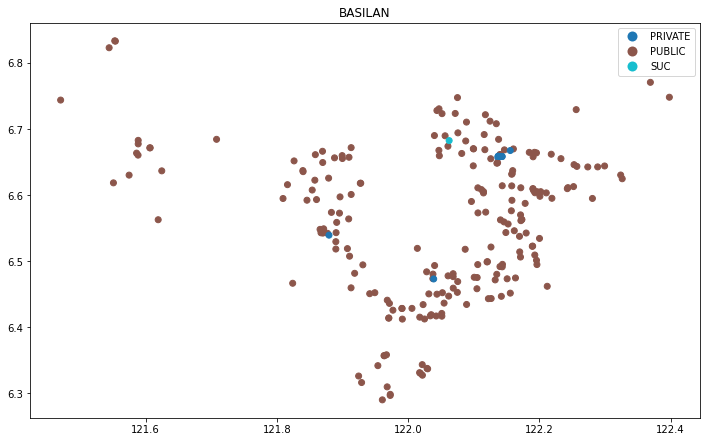

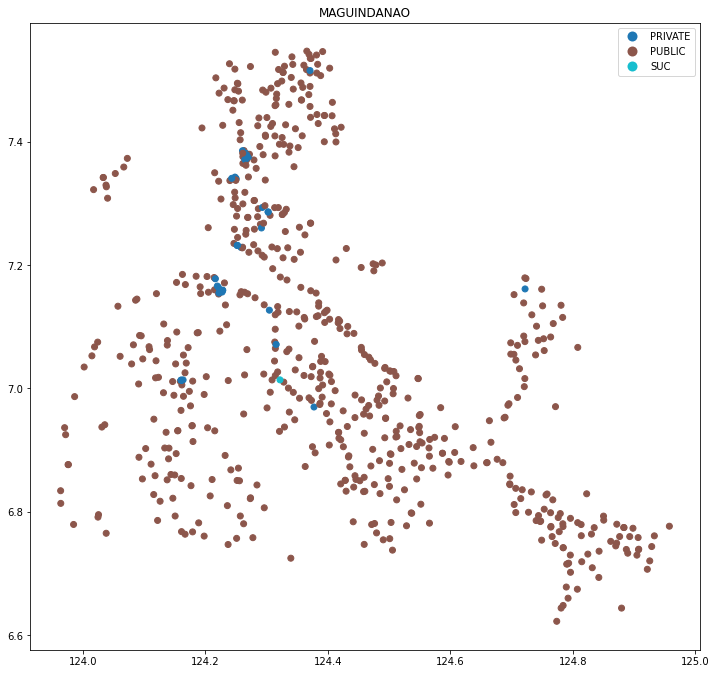

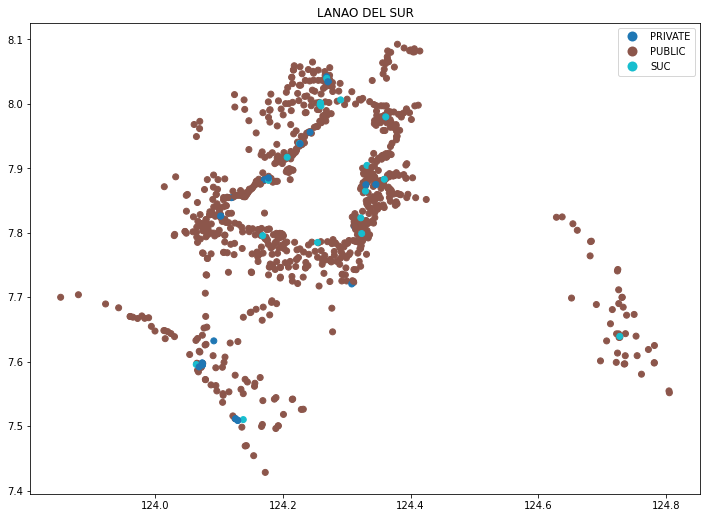

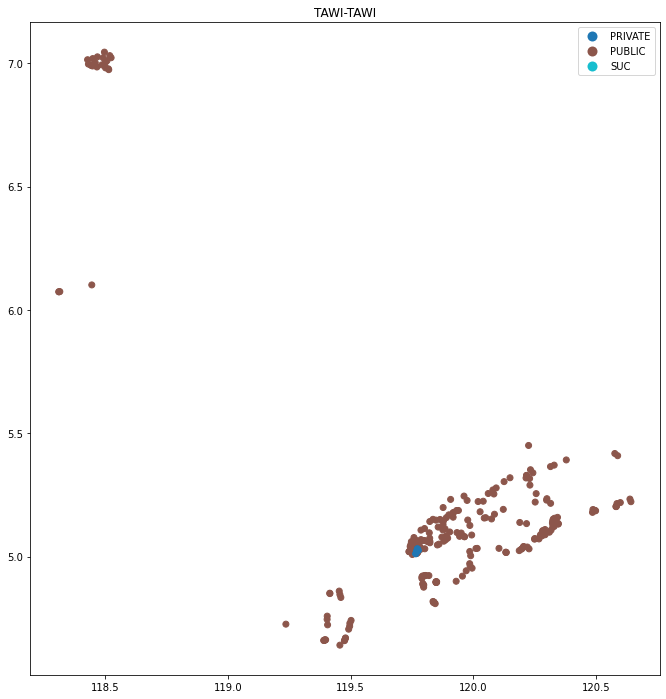

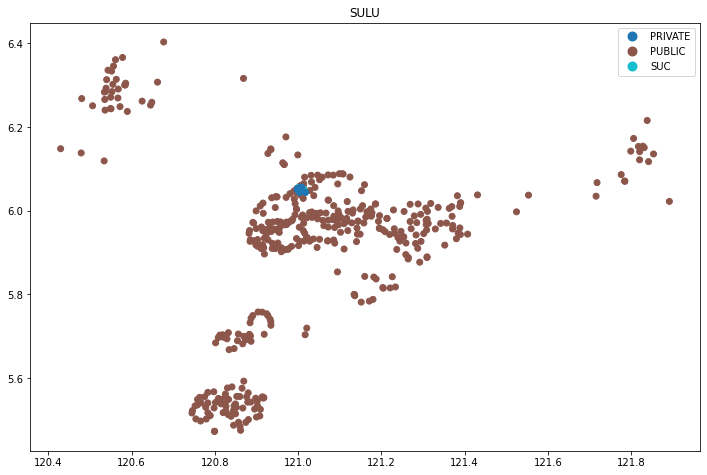

In [5]:
for province in schools_geodata['PROV'].unique():
    cond = schools_geodata['PROV']==province
    schools_geodata[cond].dropna()\
                         .plot(column="SCH_TYPE",figsize=(12, 12),legend=True)
    plt.title(province)
    plt.show()